In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import os
from scipy.stats import ttest_ind,norm
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [3]:
bbb=pd.read_csv('BBB.csv')
bbb.head()

,acctnum,gender,state,zip,zip3,first,last,book_,nonbook_,total_,purch,child,youth,cook,do_it,refernce,art,geog,buyer
0,10001,M,NY,10605,106,49,29,109,248,357,10,3,2,2,0,1,0,2,no
1,10002,M,NY,10960,109,39,27,35,103,138,3,0,1,0,1,0,0,1,no
2,10003,F,PA,19146,191,19,15,25,147,172,2,0,0,2,0,0,0,0,no
3,10004,F,NJ,7016,70,7,7,15,257,272,1,0,0,0,0,1,0,0,no
4,10005,F,NY,10804,108,15,15,15,134,149,1,0,0,1,0,0,0,0,no


In [4]:
bbb['buyer'].value_counts()['yes']

4522

In [5]:
bbb.describe()

,acctnum,zip,zip3,first,last,book_,nonbook_,total_,purch,child,youth,cook,do_it,refernce,art,geog
count,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000
mean,35000.500,11531.162,114.925,25.669,12.358,46.830,161.488,208.318,3.890,0.854,0.391,0.937,0.463,0.312,0.386,0.547
std,14433.901,5627.506,56.311,18.379,8.153,38.168,88.079,101.357,3.476,1.120,0.683,1.185,0.766,0.604,0.680,0.841
min,10001.000,801.000,8.000,1.000,1.000,15.000,0.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,22500.750,7643.000,76.000,11.000,7.000,15.000,86.000,128.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,35000.500,11208.000,112.000,21.000,11.000,28.000,162.000,209.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000
75%,47500.250,16242.000,162.000,35.000,15.000,71.000,237.000,284.000,6.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000
max,60000.000,21244.000,212.000,99.000,35.000,158.000,354.000,479.000,12.000,8.000,6.000,8.000,7.000,5.000,6.000,7.000


In [6]:
bbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
acctnum     50000 non-null int64
gender      50000 non-null object
state       50000 non-null object
zip         50000 non-null int64
zip3        50000 non-null int64
first       50000 non-null int64
last        50000 non-null int64
book_       50000 non-null int64
nonbook_    50000 non-null int64
total_      50000 non-null int64
purch       50000 non-null int64
child       50000 non-null int64
youth       50000 non-null int64
cook        50000 non-null int64
do_it       50000 non-null int64
refernce    50000 non-null int64
art         50000 non-null int64
geog        50000 non-null int64
buyer       50000 non-null object
dtypes: int64(16), object(3)
memory usage: 7.2+ MB


In [7]:
bbb['total_'].sum()

10415916

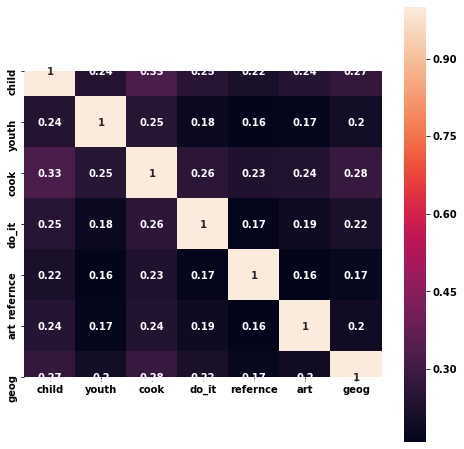

In [8]:
buy_book=bbb[['child','youth','cook','do_it','refernce','art','geog']]
corrMatrix = buy_book.corr()
plt.figure(figsize=(8, 8)) 
sns.heatmap(corrMatrix, annot=True, square=True) # annot->put numbers, square->make it square

In [9]:
bbb[['total_','purch']].corr()

,total_,purch
total_,1.000,0.515
purch,0.515,1.000


In [10]:
bbb['female']=(bbb['gender']=="F")*1
bbb['buyer_dummy']=(bbb['buyer']=="yes")*1
bbb.describe()

,acctnum,zip,zip3,first,last,book_,nonbook_,total_,purch,child,youth,cook,do_it,refernce,art,geog,female,buyer_dummy
count,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000
mean,35000.500,11531.162,114.925,25.669,12.358,46.830,161.488,208.318,3.890,0.854,0.391,0.937,0.463,0.312,0.386,0.547,0.666,0.090
std,14433.901,5627.506,56.311,18.379,8.153,38.168,88.079,101.357,3.476,1.120,0.683,1.185,0.766,0.604,0.680,0.841,0.472,0.287
min,10001.000,801.000,8.000,1.000,1.000,15.000,0.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,22500.750,7643.000,76.000,11.000,7.000,15.000,86.000,128.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,35000.500,11208.000,112.000,21.000,11.000,28.000,162.000,209.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,47500.250,16242.000,162.000,35.000,15.000,71.000,237.000,284.000,6.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000
max,60000.000,21244.000,212.000,99.000,35.000,158.000,354.000,479.000,12.000,8.000,6.000,8.000,7.000,5.000,6.000,7.000,1.000,1.000


In [11]:
x=bbb[['last','total_','female','child','youth','cook','do_it','refernce','art','geog']]
y=bbb['buyer_dummy']

In [12]:
x=sm.add_constant(x)
logit = sm.Logit(y, x)
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.241222
         Iterations 7


C:\Users\ryosu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


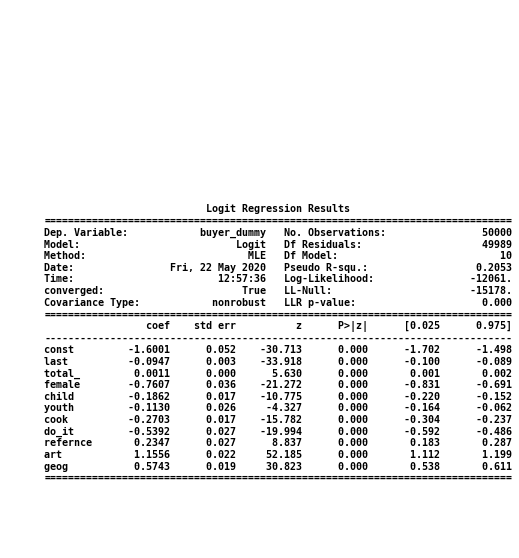

In [13]:
summary=result.summary()
fig,ax= plt.subplots(figsize=(7,10))
ax.axis('off')
ax.axis('tight')
plt.text(0.01, 0.05, str(summary), {'fontsize': 15}, fontproperties = 'monospace') 
plt.savefig('output.png')

In [14]:
bbb['predicted']=result.predict()
bbb.head()

,acctnum,gender,state,zip,zip3,first,last,book_,nonbook_,total_,...,youth,cook,do_it,refernce,art,geog,buyer,female,buyer_dummy,predicted
0,10001,M,NY,10605,106,49,29,109,248,357,...,2,2,0,1,0,2,no,0,0,0.020
1,10002,M,NY,10960,109,39,27,35,103,138,...,1,0,1,0,0,1,no,0,0,0.017
2,10003,F,PA,19146,191,19,15,25,147,172,...,0,2,0,0,0,0,no,1,0,0.016
3,10004,F,NJ,7016,70,7,7,15,257,272,...,0,0,0,1,0,0,no,1,0,0.077
4,10005,F,NY,10804,108,15,15,15,134,149,...,0,1,0,0,0,0,no,1,0,0.020


In [ ]:
bbb.describe()

In [ ]:
def odds_ratios(result_logit):
  odds=np.exp(result_logit.params[1:])
  se=np.exp(result_logit.params[1:])*result_logit.bse[1:]
  z=abs(odds-1)/se
  pvals=np.round(norm.sf(z)*2*1000)/1000
  lconf=odds-1.94*se
  rconf=odds+1.94*se
  return pd.DataFrame({'Odds ratios': odds, 'std err': se, 'z': z, 'P>|z|': pvals, '[0.025': lconf, '0.975]': rconf},index=result_logit.params.keys()[1:])

In [ ]:
odds_ratioodds_ratios(result)

In [18]:
def ntile(a,n):
  q = a.quantile(np.linspace(1/n,1,n))
  output = []
  for i in a:
    if np.isnan(i):
      k = np.nan
    else:
      k = 0
      for j in q:
        if i<=j:
          break
        k += 1
        
    output.append(k)

  return np.array(output)

In [19]:
bbb['prob_dec']=ntile(bbb['predicted'],10)
bbb['prob_dec'] = 9-bbb['prob_dec']
bbb[ ['buyer_dummy','prob_dec'] ].groupby('prob_dec').describe()

buyer_dummy                                          
               count  mean   std   min   25%   50%   75%   max
prob_dec                                                      
0           5000.000 0.387 0.487 0.000 0.000 0.000 1.000 1.000
1           5000.000 0.167 0.373 0.000 0.000 0.000 0.000 1.000
2           5000.000 0.102 0.303 0.000 0.000 0.000 0.000 1.000
3           5000.000 0.074 0.261 0.000 0.000 0.000 0.000 1.000
4           5000.000 0.057 0.231 0.000 0.000 0.000 0.000 1.000
5           5000.000 0.039 0.194 0.000 0.000 0.000 0.000 1.000
6           4998.000 0.028 0.164 0.000 0.000 0.000 0.000 1.000
7           5002.000 0.024 0.154 0.000 0.000 0.000 0.000 1.000
8           5000.000 0.018 0.133 0.000 0.000 0.000 0.000 1.000
9           5000.000 0.008 0.091 0.000 0.000 0.000 0.000 1.000

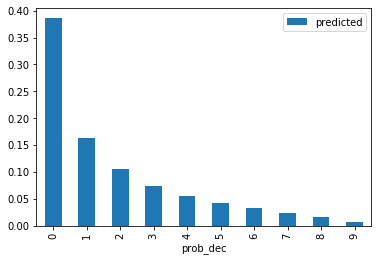

In [20]:
bbb[ ['predicted','prob_dec'] ].groupby('prob_dec').mean().plot(kind='bar')
plt.savefig('response_rate_by_decile.png')

3. Generate a report showing number of customers, the number of buyers of "The Art
History of Florence' and the response rate to the offer by decile for the random sample
(i.e. the 50,000 customers) in the dataset.

In [21]:
Cust_report=bbb[['buyer','prob_dec']].groupby('prob_dec').count()
Cust_report['#ofcust']=bbb[['buyer','prob_dec']].groupby('prob_dec').count()
Cust_report['#ofbuyer']=bbb[['buyer_dummy','prob_dec']].groupby('prob_dec').sum()
Cust_report['responserate']=Cust_report['#ofbuyer']/Cust_report['#ofcust']
Cust_report=Cust_report.drop("buyer", axis=1)
Cust_report

,#ofcust,#ofbuyer,responserate
prob_dec,,,
0,5000,1935,0.387
1,5000,836,0.167
2,5000,511,0.102
3,5000,368,0.074
4,5000,284,0.057
5,5000,196,0.039
6,4998,139,0.028
7,5002,121,0.024
8,5000,90,0.018


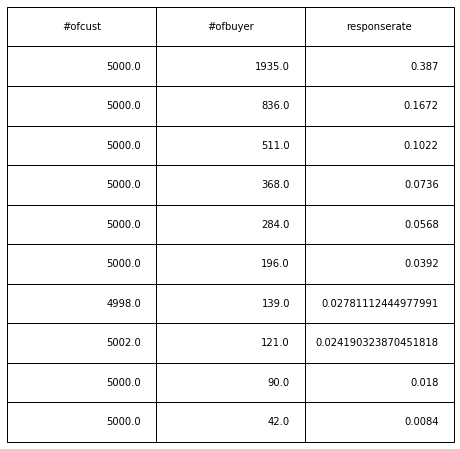

In [22]:
fig,ax= plt.subplots(figsize=(8,8))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=Cust_report.values,
         colLabels=Cust_report.columns,
         loc='center',
         bbox=[0,0,1,1])
plt.savefig('table.png')

4. For the 50,000 customers in the dataset, generate a report showing the mean values of
the following variables by probability of purchase decile:
Total $ spent
Months since last purchase, and
Number of books purchased for each of the seven categories (i.e., children, youth,
cookbooks, do-it-yourself, reference, art and geography). 

In [23]:
bbb[ ['total_','last','prob_dec','child','youth','cook','do_it','refernce','art','geog'] ].groupby('prob_dec').mean()

,total_,last,child,youth,cook,do_it,refernce,art,geog
prob_dec,,,,,,,,,
0,257.353,7.194,1.065,0.514,1.067,0.471,0.563,1.501,1.331
1,224.869,7.958,0.836,0.393,0.848,0.393,0.405,0.753,0.891
2,214.228,8.619,0.791,0.365,0.796,0.370,0.383,0.480,0.701
3,207.643,8.783,0.753,0.363,0.797,0.340,0.308,0.302,0.540
4,199.112,9.573,0.758,0.334,0.821,0.370,0.272,0.217,0.464
5,199.130,10.938,0.748,0.365,0.865,0.394,0.259,0.163,0.386
6,191.297,12.372,0.761,0.348,0.836,0.421,0.227,0.132,0.295
7,191.598,14.418,0.805,0.360,0.909,0.448,0.205,0.114,0.254
8,193.611,17.858,0.961,0.405,1.118,0.651,0.252,0.128,0.316


Part III: Lifts and Gains
1. Use the information from the report in II.3 above to create a table showing the lift and
cumulative lift for each decile. You may want to use Excel for these calculations.
2. Create a chart showing the cumulative lift by decile.
3. Use the information from the report in II.3 above to create a table showing the gains and
cumulative gains for each decile. You may want to use Excel for these calculations.
4. Create a chart showing the cumulative gains by decile along with a reference line
corresponding to 'no model'. 


In [24]:
Lift_calc=bbb[['buyer','prob_dec']].groupby('prob_dec').count()

In [25]:
Lift_calc['#ofcust']=bbb[['buyer','prob_dec']].groupby('prob_dec').count()
Lift_calc['cum#ofcust']=Lift_calc['#ofcust'].cumsum()
Lift_calc['%cum#ofcust']=Lift_calc['cum#ofcust']/(Lift_calc['#ofcust'].sum())
Lift_calc['#ofbuyer']=bbb[['buyer_dummy','prob_dec']].groupby('prob_dec').sum()
Lift_calc['cum#ofbuyer']=Lift_calc['#ofbuyer'].cumsum()
Lift_calc['responserate']=Lift_calc['#ofbuyer']/Cust_report['#ofcust']
Lift_calc['cum_responserate']=Lift_calc['cum#ofbuyer']/Lift_calc['cum#ofcust']
avr_resrate=(bbb['buyer_dummy'].sum())/(bbb['buyer'].count())
Lift_calc['Lift']=(Lift_calc['responserate']/avr_resrate)*100
Lift_calc['CumLift']=(Lift_calc['cum_responserate']/avr_resrate)*100
Lift_calc=Lift_calc.drop('buyer', axis=1)

In [26]:
Lift_calc

,#ofcust,cum#ofcust,%cum#ofcust,#ofbuyer,cum#ofbuyer,responserate,cum_responserate,Lift,CumLift
prob_dec,,,,,,,,,
0,5000,5000,0.100,1935,1935,0.387,0.387,427.908,427.908
1,5000,10000,0.200,836,2771,0.167,0.277,184.874,306.391
2,5000,15000,0.300,511,3282,0.102,0.219,113.003,241.928
3,5000,20000,0.400,368,3650,0.074,0.182,81.380,201.791
4,5000,25000,0.500,284,3934,0.057,0.157,62.804,173.994
5,5000,30000,0.600,196,4130,0.039,0.138,43.344,152.219
6,4998,34998,0.700,139,4269,0.028,0.122,30.751,134.872
7,5002,40000,0.800,121,4390,0.024,0.110,26.747,121.351
8,5000,45000,0.900,90,4480,0.018,0.100,19.903,110.079


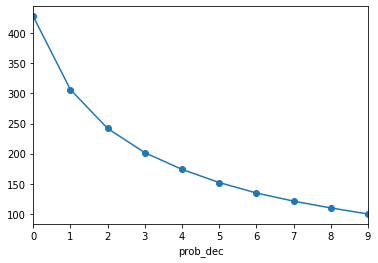

In [27]:
Lift_calc['CumLift'].plot(kind='line',marker='o')
plt.savefig('cumlift.png')

In [28]:
Lift_calc['Gains']=Lift_calc['#ofbuyer']/(Lift_calc['#ofbuyer'].sum())
Lift_calc['CumGains']=Lift_calc['Gains'].cumsum()
Lift_calc['prob_dec']=bbb['prob_dec']
CumGainData=Lift_calc[['cum#ofcust','Gains','CumGains']]
CumGainData

,cum#ofcust,Gains,CumGains
prob_dec,,,
0,5000,0.428,0.428
1,10000,0.185,0.613
2,15000,0.113,0.726
3,20000,0.081,0.807
4,25000,0.063,0.870
5,30000,0.043,0.913
6,34998,0.031,0.944
7,40000,0.027,0.971
8,45000,0.020,0.991


In [29]:
df1=Lift_calc[['cum#ofcust','Gains','CumGains']]
df2= pd.DataFrame(data=[[0,0,0]],columns=['cum#ofcust','Gains','CumGains'],index=['origin'])
df1=df1.append(df2, ignore_index = False)
df1=df1.sort_values(by=['CumGains'])
df1=df1.rename(index={9: 10,8: 9,7: 8,6: 7,5: 6,4: 5,3:4,2:3,1:2,0: 1,'origin':0})
df1

,cum#ofcust,Gains,CumGains
0,0,0.000,0.000
1,5000,0.428,0.428
2,10000,0.185,0.613
3,15000,0.113,0.726
4,20000,0.081,0.807
5,25000,0.063,0.870
6,30000,0.043,0.913
7,34998,0.031,0.944
8,40000,0.027,0.971
9,45000,0.020,0.991


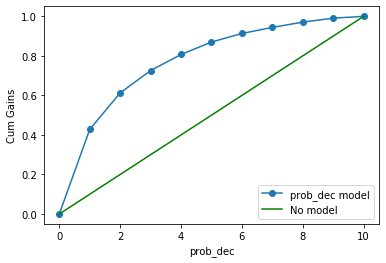

In [30]:
plt.plot(df1['CumGains'],marker='o' )
plt.plot([0,10],[0,1],'g',)
plt.xlabel('prob_dec')
plt.ylabel('Cum Gains')
plt.legend(['prob_dec model',"No model"], loc=4)
plt.savefig('compare.png')

Part IV: Profitability Analysis
Use the following cost information to assess the profitability of using logistic regression to
determine which of the remaining 500,000 customers should receive a specific offer:

Cost to mail offer to customer:$.50

Selling price (shipping included):$18.00

Wholesale price paid by BookBinders:$9.00

Shipping costs:$3.00
1. What is the breakeven response rate?
2. For the customers in the dataset, create a new variable (call it "target") with a value of 1
if the customer's predicted probability is greater than or equal to the breakeven response
rate and 0 otherwise. PTO
Page 4
3. Considering that there are 500,000 remaining customers, generate a report summarizing
the number of customers, the expected number of buyers of 'The Art History of Florence' and the
expected response rate to the offer by the "target" variable.
4. For the 500,000 remaining customers, what would the expected gross profit (in dollars,
and also as a percentage of gross sales) and the expected return on marketing
expenditures have been if BookBinders had mailed the offer to buy "The Art History of
Florence" only to customers with a predicted probability of buying that was greater than
or equal to the breakeven rate?

The campaign is effective as lons as (18-9-3)*response rate > 0.5
thus, response rate must be higher than 0.5/6

In [31]:
BER=0.5/6
print("Break evem response rate is", end=' '), print('{:.3g}'.format(BER))

Break evem response rate is 0.0833


(None, None)

In [32]:
bbb['target']=(bbb['predicted']>=BER)*1

In [33]:
bbb['target'].mean()

0.3112

In [34]:
target=(bbb[['acctnum','target']].groupby('target').count())*10
target['#ofCust']=(bbb[['acctnum','target']].groupby('target').count())*10
target['E#ofbuyer']=(bbb[['buyer_dummy','target']].groupby('target').sum())*10
target['E_res_rate']=target['E#ofbuyer']/target['#ofCust']
target=target.drop('acctnum',axis=1)
target

,#ofCust,E#ofbuyer,E_res_rate
target,,,
0,344400,11990,0.035
1,155600,33230,0.214


In [3]:
E_profit=(155600*0.21356*6)-(0.5*155600)
E_sales=344400*0.0348*6
ROI=(E_profit/(0.5*155600))*100
print('Expexted profit is', end=" "), print('{:.3f}'.format(E_profit))
print('Expexted sales is', end=" "), print('{:.3f}'.format(E_sales))
print('Expexted ROI is', end=" "), print('{:.3f}'.format(ROI), end=""), print('%')

Expexted profit is 121579.616
Expexted sales is 71910.720
Expexted ROI is 156.272%


(None, None, None)